revision information:
- Sep. 20th. 2018 [first version]
- Oct. 22nd. 2018

# rsfMRI time course data handling

Before you start following this material, please make sure that you had installed all nessesary tools listed below in your PC
1. **ITK-snap**: powerful tool for image segmentation
2. Python libraries:
    - **nibabel**: MRI image I/O module
    - **numpy, scipy, scikit-learn**: tools for scientific computing
    - **matplotlib**: data visualilzation

### Learning objectives

After study of the assigned learning materials, the student will know:
1. how to import and plot data on Jupyter notebook (matplotlib)
2. how to draw region-of-interest using ITK-snap
3. how to calculate correlation coefficient using scipy package

The sample rodent resting-state fMRI image is enclosed in the subdirectory 'Data'.

Please complete the assignment using this data.

### How to import data

We will use nibabel to import data, first we will import nibabel module to this notebook

In [1]:
import nibabel as nib

Next, let's import data located in the 'Data'.

- Type `path = 'Data` and press 'Tab' key on the python block below. 
- Since we only has one file, 'Tab' key will complete the filename field.
- Next, let's import the data into the `img` instance in thie Notebook.
- Method:`load(path)` of nibabel module will import data to namespace. (Python use '.' operation to call method)
- Finally, please check the data shape using `img.shape`. 
    - As you can see, `shape` does not use `()` when be called, it's attribute of the object instead of function.
    - Attribute of the object works as instance but is just integrated in parent object.
- using `dir()` function, you can check what function and attribute you can use in the object.
    - Try `dir(img)`

In [ ]:
path = 

In [ ]:
img = nib.

In [ ]:
img.shape

### How to plot data

We will use matplotlib to plot 2D timecourse data.
- Below `%pylab inline` command will import matplotlib.pylab module as Jupyter notebook plugin.
- The argument 'inline' set plotting backend to the output field of jupyter notebook, so you can plot image on this notebook.
- It also `import numpy as np` so no need additional import of numpy.

In [2]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


Now you can plot data on this notebook. Let's start
- `plot()` function plots y versus x as lines and/or markers.
- `imshow()` function displays an image, i.e. data on a 2D regular raster.
- use `plot?<enter>` to see help document.
    - Jupyter notebook provides convinient functions to work with python modules. If you have no idea how to use the function, just check it out.


In [ ]:
plot?

First, I will provide randomly generated array using numpy. Try plot this data using `plot()` function
- np.random.seed([int]) is applied for reproducible plot result.
    - with constant int as seed id, you will get the same random values when you perform random number generation
- by applying seed as below, the random module generate psudo-random data based on the input index:0
- to understand how to input argument for new methods or functions using in this notebook, don't hesitate to try `?` operation to check help documnet.

In [ ]:
np.random.seed(0)
sample_data = np.random.randint(1, 100, 200)

Now try to plot as the sample_data.

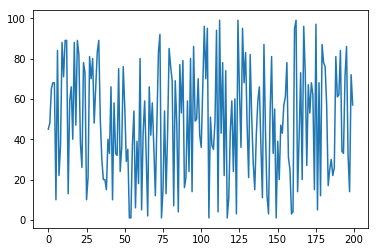

- If you need more information about the available plotting option using matplotlib, please check this link:  https://matplotlib.org/gallery/index.html
- We are going to handle this for later session.

### Data structure of fMRI data
- Before start analyze data, we need to understand beyond three dimension space.
- At this point, let's figure out how we can represent four dimension.

<img src="images/figure_2-1.png" alt="Drawing" style="width: 600px;"/>

- Numpy array provide a way to index N dimensional data convinient way.
<img src="images/figure_2-2.png" alt="Drawing" style="width: 600px;"/>

- Using this knowledge, let's try working with real data.

### Draw region of interest (ROI) on the brain image

- The provided sample data is 4 dimentions data that composed with 3D image + time.
- The size of 4D data is typically large, so takes more memory. 
- In order reduce memory usage when drawing the ROI, we need to average the data into time axis.
- This time, I will provide complete code, but please try to understand how it works.
    - To understand below code, you need to check numpy indexting and axis

In [ ]:
img_dataobj = np.asarray(img._dataobj)
avr_dataobj = np.mean(img_dataobj, axis=-1)
avr_dataobj.shape

- Also let's plot averaged image using imshow.

In [ ]:
imshow(avr_dataobj[:,:,16])

** [Foot notes] **
- *The nibabel image object contains array data in the `_dataobj` attributes.*
    - *It's numpy.array like data, but in order to help to handle huge data, it's memory map based proxy object.*
    - *In order to use this data as array, we need to convert this data to numpy.array object.*
- *When you working with array, by defining axis, you can apply any numpy methods along the axis.*
    - *Below code will apply `mean()` method on `img._dataobj` along the last axis:`-1` (you can use `3` instead).*
    - *Remember that Python use `0` for first index like C language, so `3` means 4th index*
    - *Always check the `shape` attributes of array object to check the method properly applied.*

#### Save the averaged image array to Nifti image file.
- Below code will create Nifti image object using `nibabel`.
    - You need to provide numpy array as 1st argument and affine matrix as second argument.
    - Please do your own research what is affine matrix to understand data structure of neuroimaging data.
    - nibabel image object contains this affine matrix on `affine` attribute.

In [ ]:
avr_img = nib.Nifti1Image(avr_dataobj, img.affine)
avr_img.to_filename('Data/avr_img.nii.gz')

#### Launch ITK-snap
- load the `avr_img.nii.gz` and draw ROI on the left and right primary motor cortex with index 1 and 2 respectivly.
- save segmentation data as `M1_mask.nii.gz` and load the image using same way as `img` object but use `m1` as name instead.
- check the shape of imported data.

In [ ]:
m1 = 

### Extracting time-course data from `img` object.
- The below code will extracting the timecourse data from the img object.
- Please do your own research how multiple indexing works on numpy array.

In [ ]:
m1_mask = np.asarray(m1._dataobj)
left_m1 = (m1_mask == 1)
right_m1 = (m1_mask == 2)

left_m1_indice = np.nonzero(left_m1)
right_m1_indice = np.nonzero(right_m1)

left_m1_data = img_dataobj[left_m1_indice]
right_m1_data = img_dataobj[right_m1_indice]

- Check how the data looks like using `shape`
- Typicaly, when we extracting the timecourse data from ROI, data need to be averaged along first axis to reduce noises.
    - Try to average data and plot it yourself.
    - and plot it using `plot()` function.

In [ ]:
plot()

In [ ]:
plot()

##### Tip
- If you plot two different data at one code cell, you can get a merged figure. try it on the cell below

### Calculate correlation coefficient
- Now it's time to calculate correlation coefficient using Pearson's method.
- let's `import scipy.stats` and use `pearsonr` method.
    - Python also allow you to import child method with `from [module] import [method]` command.

In [ ]:
from scipy.stats import pearsonr

In [ ]:
pearsonr?

### Assignments
1. Google the location of the `Striatum` in rat, and draw a ROI on `left Striatum`.
2. Create your own `Jupyter notebook` for this assignment for this assignment.
    1. Wrote short description about 
        - what structure compose striatum.
        - the major function of striatum.
    2. Extract timecourse from the ROI you drawn.
    3. Calculate Pearson's correlation coefficient between left striatum and left M1. then do the same between left striatum and right M1.

# END